<p align="center">
    <font size=8> <b><i><span style="color:green">Student Performance Indicator</span></i></b></font>
</p>
<br></br>

<p>
    <font size=5><b><i><span style="color:purple">Life Cycle Of Machine Learning Project</span></i></b></font>
</p>

- Define the problem Statement.
- Data gathering.
- Discover and visualize the data to gain insights.
- Prepare the data for machine learning.
- Model selection and training.
- Model evaluation and fine tuning.
- Presentation of solution.
- Launch , monitor and maintain.

<p>
    <font size=5><b><i><span style="color:purple">1) Problem statement</span></i></b></font>
</p>

- How student's performance (test scores) are affected by various factors such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation.

<p>
    <font size=5><b><i><span style="color:purple">2) Data gathering </span></i></b></font>
</p>

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

<p>
    <font size=5><b><i><span style="color:purple">3) Discover and visualize the data to gain insights</span></i></b></font><br></br>
</p>




In [3]:
## Import required packages 

import pandas as pd
import numpy as np
import seaborn as sns
import os
import shutil
import seaborn as sns


from matplotlib import pyplot as plt 
from warnings import filterwarnings

filterwarnings('ignore')

%matplotlib inline


 <p><font size=3><br><t> Load the dataset </t></br></font></p>

In [4]:
#Load the dataset 
student_df = pd.read_csv('../data_repository/uncleaned/StudentsPerformance.csv')

Display top 5 records

In [5]:
#Display top 5 records
student_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [6]:
#Shape of the dataset 
student_df.shape

(1000, 8)

Dataset contains 1000 samples and 8 features

In [7]:
##Convert all columns names to lowercase and replace the spaces with an underscore "-"
student_df.columns = [col.lower().replace(" ","_")for col in student_df.columns]

In [8]:
#Replace "/" with an underscore "_"
student_df.columns = [col.lower().replace("/","_") for col in student_df.columns]

In [9]:
student_df.to_csv('../data_repository/cleaned/StudentPerformance.csv',index=False, header = True, columns=student_df.columns)

<p>
    <font size=5><b><i><span style="color:purple">4) Dataset information </span></i></b></font><br></br>
</p>

  - gender : sex of students  -> (Male/female)
  - race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
  - parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
  - lunch : having lunch before test (standard or free/reduced)
  - test preparation course : complete or not complete before test
  - math score
  - reading score
  - writing score

<p>
    <font size=5><b><i><span style="color:purple">5) Checks to perform</span></i></b></font><br></br>
</p>

- Check for data type
- Check for descriptive statistics
- Check for missing values
- Check for duplicates
- Check for unique values of each column 
- Check for skewness in the data


<p><font size=4><span style="color:purple">5.1- Check for data type</span></font></p>

In [10]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<p> <font size=3><span style="color:purple">Observation:</span></font></p>

 - Numerical columns : math_score , reading_score , writing_score
 - Categorical columns : gender , race_ethnicity , parental_level_of_education , lunch , test_preparation_course

<p><font size=4><span style="color:purple">5.2 - Check for descriptive statistics </span></font></p>

In [11]:
student_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<p><font size=3><span style="color:purple">Insight:</span></font></p>

 - From above descriptive statistics, all means are closure between 66 and 69.16.
 - All standard deviations are close between 14.6 and 15.19.
 - Minimum score obtained by student in maths is '0', in writing is '10' and in reading is '17'.
 - skweness:
      - Maths - No skewness as mean and median are having almost same value (66.089 and 66.00)   
      - Reading and Writing  - Slighlity left skewed as median > mean.

<p><font size=4><span style="color:purple">5.3- Check for missing values</span></font></p>

In [12]:
student_df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

<p><font size=4><span style="color:purple">5.4 - Check for duplicates </span></font></p>

In [13]:
student_df.duplicated().sum()

0

There are no duplicates in the dataset

<p><font size=4><span style="color:purple">5.5 - Check for unique values of each column  </span></font></p>

In [14]:
student_df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
unique = {}
for idx in student_df.select_dtypes(include='object').columns:
    unique[idx] = student_df[idx].unique()
    print(f"{idx} = {unique[idx]}")

gender = ['female' 'male']
race_ethnicity = ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch = ['standard' 'free/reduced']
test_preparation_course = ['none' 'completed']


<p><font size=4><span style="color:purple">5.6- Check for skewness in the data</span></font></p>

In [16]:
numeric = student_df.select_dtypes(exclude='object').columns
skewness = student_df[numeric].skew().sort_values(ascending=False)
print(skewness)

reading_score   -0.259105
math_score      -0.278935
writing_score   -0.289444
dtype: float64


The data are fairly skewed as it the values are greater than -0.5 and less than 0.5 values

In [17]:
reading_full_marks = student_df[student_df['reading_score'] == 100]['reading_score'].count()
writing_full_marks = student_df[student_df['writing_score'] == 100]['writing_score'].count()
maths_full_marks = student_df[student_df['math_score'] == 100]['math_score'].count()

print(f'{reading_full_marks} -  students got full marks in reading')
print(f'{writing_full_marks} -  students got full marks in writing')
print(f'{maths_full_marks} - students got full marks in maths')

17 -  students got full marks in reading
14 -  students got full marks in writing
7 - students got full marks in maths


In [18]:
reading_full_marks = student_df[student_df['reading_score'] <= 20]['reading_score'].count()
writing_full_marks = student_df[student_df['writing_score'] <= 20]['writing_score'].count()
maths_full_marks = student_df[student_df['math_score'] <= 20]['math_score'].count()

print(f'{reading_full_marks} -  students got less than 20 marks in reading')
print(f'{writing_full_marks} -  students got less than 20 marks in writing')
print(f'{maths_full_marks} - students got less than 20  marks in maths')

1 -  students got less than 20 marks in reading
3 -  students got less than 20 marks in writing
4 - students got less than 20  marks in maths


<p>
    <font size=5><b><i><span style="color:purple">6) Exploring Data ( Visualization) </span></i></b></font><br></br>
</p>

<p>
    <font size=4><span style="color:purple">6.1  Visualize maths score distribution to make some conclusion. </span></font>
</p>

 - Histogram
 - Kernel Distribution Function (KDE)

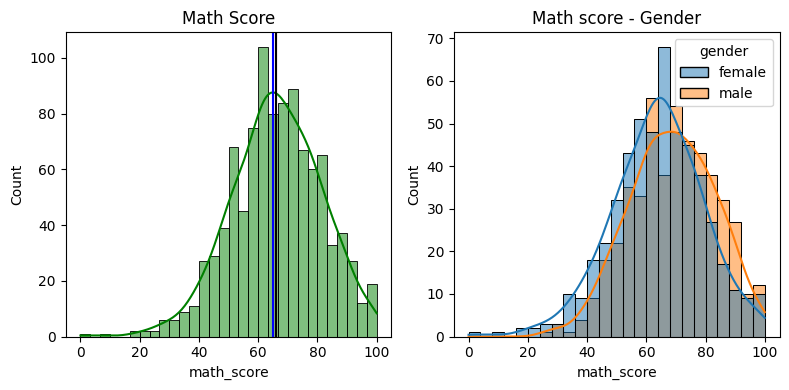

In [135]:
plt.figure(figsize=(8,4))
plt.subplot(121);
sns.histplot(data = student_df , x = 'math_score', kde = True , color='g' , bins=30)
plt.axvline (student_df['math_score'].mean(), color='red' , label = "Mean")
plt.axvline (student_df.math_score.median(), color = 'black', label= "Median")
plt.axvline (student_df.math_score.mode()[0],color = 'blue', label ="Mode")
plt.title('Math Score')

plt.subplot(122)
sns.histplot(data=student_df , x ='math_score', hue='gender',kde=True)
plt.title('Math score - Gender')
plt.tight_layout()
plt.show()


<p><font size=3><span style="color:purple">Insight:</span></font></p>

 - Math score is slightly left skewed.
 - Math score is capped to 100.
 - Female students tend to perform well than male students.

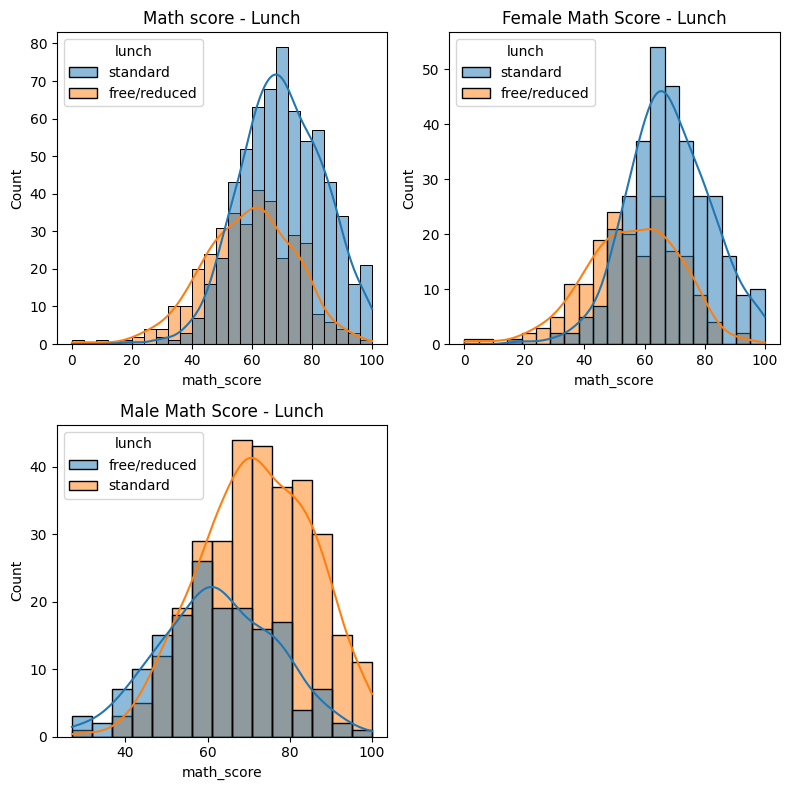

In [118]:
plt.figure(figsize=(8,8))
plt.subplot(221)
sns.histplot(data = student_df, x='math_score', hue='lunch', kde=True)
plt.title('Math score - Lunch')

plt.subplot(222)
sns.histplot(data=student_df[student_df['gender'] == 'female'], x= 'math_score', hue='lunch', kde=True)
plt.title('Female Math Score - Lunch')

plt.subplot(223)
sns.histplot(data=student_df[student_df['gender']== 'male'] , x='math_score', hue='lunch', kde=True)
plt.title('Male Math Score - Lunch')
plt.tight_layout()
plt.show()


<p><font size=3><span style="color:purple">Insight</span></font></p>

- Standarad lunch helps student to score good Math score. 

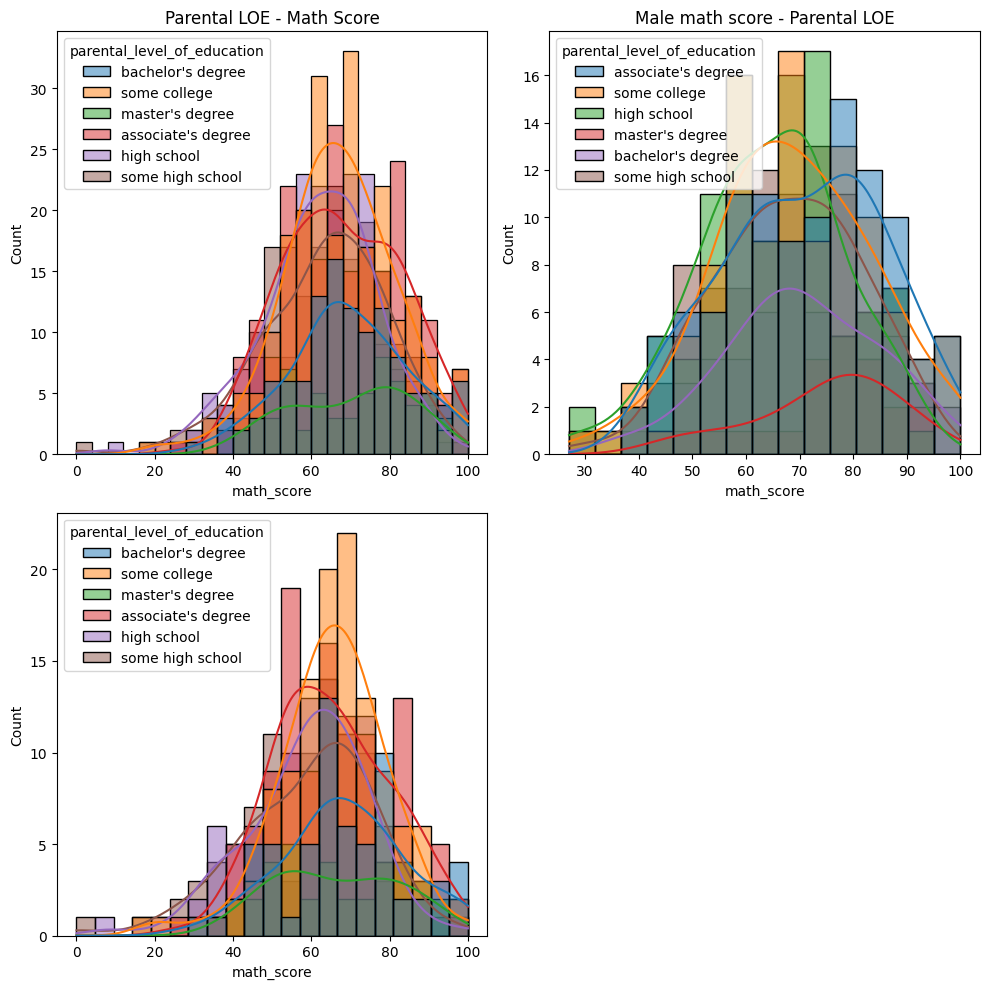

In [136]:
plt.figure(figsize= (10,10))
plt.subplot(2,2,1)
sns.histplot(data = student_df, x='math_score', hue='parental_level_of_education', kde=True)
plt.title('Parental LOE - Math Score')

plt.subplot(2,2,2)
sns.histplot(data = student_df[ student_df['gender'] == 'male'], x = 'math_score', hue='parental_level_of_education',kde=True)
plt.title('Male math score - Parental LOE')

plt.subplot(2,2,3)
sns.histplot(data = student_df[student_df['gender'] == 'female'], x = 'math_score', hue='parental_level_of_education',kde=True)
plt.tight_layout()
plt.show()

<p><font size=3><span style="color:purple">Insight</span></font></p>

 - Parent's educational background don't help student to perform well in Maths

In [119]:
student_df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')